# Single-Task Learning on Cifar100 Dataset (20 Superclasses): A CNN Approach
- **Name**: Minh T. Nguyen & Peter Chen.
- **ECE 6524** - Final Project.
- **Date**: 4/18/2023.
- **Objective**: Build a Single Task CNN model using ResNet152 architecture for 20-classes image classification on Cifar100.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.datasets import cifar100
from keras.utils import np_utils, plot_model
from keras.layers import Input, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet152, preprocess_input
from keras import Model, Sequential

# 1. Data Visualization & Preprocessing

In [2]:
num_classes = 20          # number of classes
input_shape = (32, 32, 3) # original input image size

In [3]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'coarse')

169001437/169001437 [==============================] - 2s 0us/step


In [4]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


## 1.1. Data Visualization

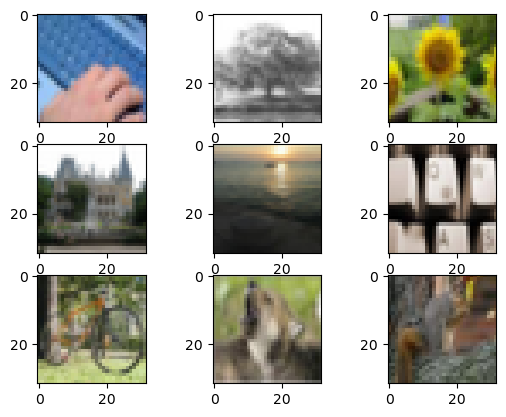

In [5]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Data Preprocessing

In [6]:
# normalize input data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [7]:
# convert class into one hot encoder
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

y_train:  (50000, 20)
y_test:  (10000, 20)


# 2. Modeling
**Note**: Build a sequential model using ResNet152 architecture

In [8]:
# Define ResNet152 CNN model
def create_model(dropout):
    input_shape = (32, 32, 3)
    
    resnet152_base = ResNet152(weights=None, include_top=False, input_shape=input_shape)
    
    model = Sequential()
    
    model.add(resnet152_base)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(20, activation='softmax'))
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               3

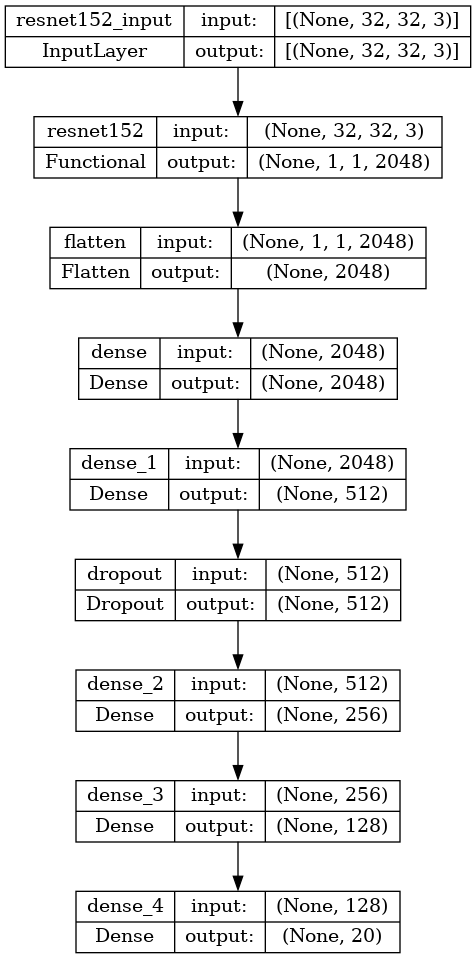

In [9]:
# display and plot model
model = create_model(0)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# define number of epochs
epochs = 20

# 2.1 Model 1 (Batch Size = 128, Dropout = 0, Optimizer = Adam)


In [11]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'Adam'

model_1 = create_model(dropout)

In [12]:
# compile model
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
# train model
history_1 = model_1.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 167s 162ms/step - loss: 2.8921 - accuracy: 0.0955 - val_loss: 2.8463 - val_accuracy: 0.0947
Epoch 2/20
333/333 [==============================] - 50s 151ms/step - loss: 2.6422 - accuracy: 0.1477 - val_loss: 2.8850 - val_accuracy: 0.1156
Epoch 3/20
333/333 [==============================] - 50s 151ms/step - loss: 2.5186 - accuracy: 0.1844 - val_loss: 2.5966 - val_accuracy: 0.1947
Epoch 4/20
333/333 [==============================] - 51s 152ms/step - loss: 2.3647 - accuracy: 0.2434 - val_loss: 2.5095 - val_accuracy: 0.2369
Epoch 5/20
333/333 [==============================] - 51s 153ms/step - loss: 2.2733 - accuracy: 0.2696 - val_loss: 2.3174 - val_accuracy: 0.2767
Epoch 6/20
333/333 [==============================] - 52s 155ms/step - loss: 2.1439 - accuracy: 0.3080 - val_loss: 2.5939 - val_accuracy: 0.2645
Epoch 7/20
333/333 [==============================] - 51s 154ms/step - loss: 2.0761 - accuracy: 0.3375 - val_loss: 2.2731 - val_a

In [14]:
# train model results
print('Train Loss:', history_1.history['loss'][-1])
print('Train Acc:', history_1.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_1.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.349981665611267
Train Acc: 0.570870578289032

Test Loss: 1.9810540676116943
Test Acc: 0.4296000003814697


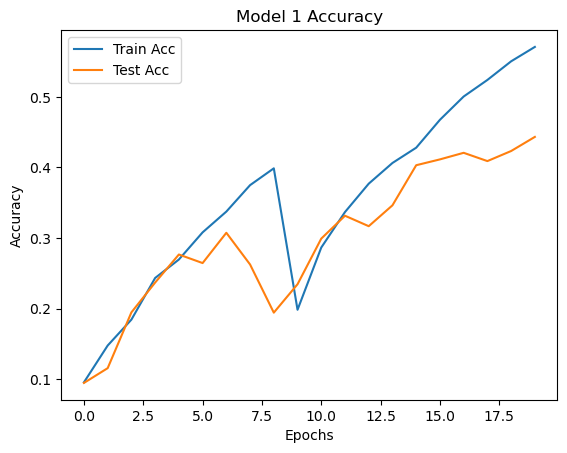

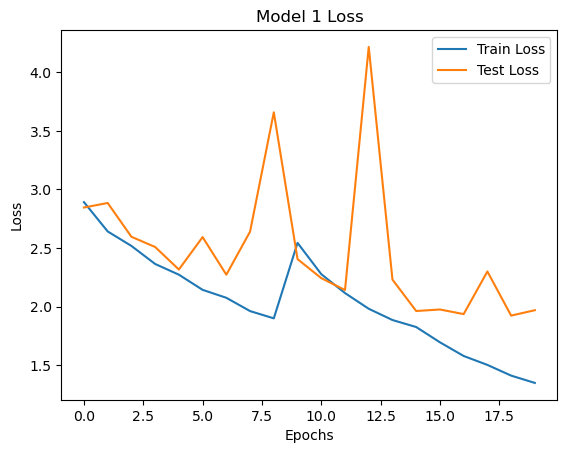

In [15]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Test Acc')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.2 Model 2 (Batch Size = 64, Dropout = 0, Optimizer = Adam)

In [16]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'Adam'

model_2 = create_model(dropout)

In [17]:
# compile model
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
# train model
history_2 = model_2.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 194s 136ms/step - loss: 2.8354 - accuracy: 0.1031 - val_loss: 2.8548 - val_accuracy: 0.1160
Epoch 2/20
665/665 [==============================] - 86s 129ms/step - loss: 2.6177 - accuracy: 0.1554 - val_loss: 2.6896 - val_accuracy: 0.1625
Epoch 3/20
665/665 [==============================] - 87s 132ms/step - loss: 2.4951 - accuracy: 0.2076 - val_loss: 2.4951 - val_accuracy: 0.2151
Epoch 4/20
665/665 [==============================] - 87s 131ms/step - loss: 2.4465 - accuracy: 0.2292 - val_loss: 2.4903 - val_accuracy: 0.2337
Epoch 5/20
665/665 [==============================] - 87s 131ms/step - loss: 2.3783 - accuracy: 0.2524 - val_loss: 2.8791 - val_accuracy: 0.1880
Epoch 6/20
665/665 [==============================] - 87s 130ms/step - loss: 2.2627 - accuracy: 0.2815 - val_loss: 2.4357 - val_accuracy: 0.2960
Epoch 7/20
665/665 [==============================] - 86s 130ms/step - loss: 2.0866 - accuracy: 0.3347 - val_loss: 2.2088 - val_a

In [19]:
# train model results
print('Train Loss:', history_2.history['loss'][-1])
print('Train Acc:', history_2.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_2.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.464341402053833
Train Acc: 0.5408235192298889

Test Loss: 2.3433876037597656
Test Acc: 0.39570000767707825


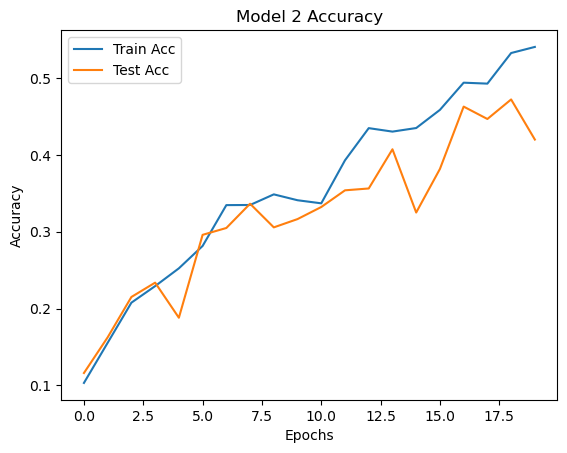

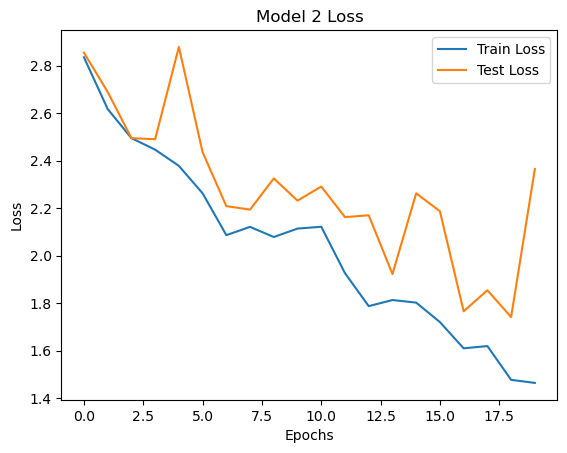

In [20]:
# Accuracy Plot
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Test Acc')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.3 Model 3 (Batch Size = 64, Dropout = 0.4, Optimizer = Adam)

In [21]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'Adam'

model_3 = create_model(dropout)

In [22]:
# compile model
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
# train model
history_3 = model_3.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 195s 139ms/step - loss: 2.9011 - accuracy: 0.0896 - val_loss: 2.7297 - val_accuracy: 0.1211
Epoch 2/20
665/665 [==============================] - 89s 134ms/step - loss: 2.6600 - accuracy: 0.1415 - val_loss: 2.6962 - val_accuracy: 0.1529
Epoch 3/20
665/665 [==============================] - 90s 135ms/step - loss: 2.5517 - accuracy: 0.1789 - val_loss: 2.6707 - val_accuracy: 0.1415
Epoch 4/20
665/665 [==============================] - 89s 133ms/step - loss: 2.5360 - accuracy: 0.1957 - val_loss: 2.6663 - val_accuracy: 0.1843
Epoch 5/20
665/665 [==============================] - 88s 132ms/step - loss: 2.3342 - accuracy: 0.2648 - val_loss: 2.4436 - val_accuracy: 0.2504
Epoch 6/20
665/665 [==============================] - 88s 133ms/step - loss: 2.2124 - accuracy: 0.3067 - val_loss: 2.7383 - val_accuracy: 0.2063
Epoch 7/20
665/665 [==============================] - 89s 134ms/step - loss: 2.1559 - accuracy: 0.3250 - val_loss: 2.1990 - val_a

In [24]:
# train model results
print('Train Loss:', history_3.history['loss'][-1])
print('Train Acc:', history_3.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_3.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.6033406257629395
Train Acc: 0.4956941306591034

Test Loss: 2.2007036209106445
Test Acc: 0.3693000078201294


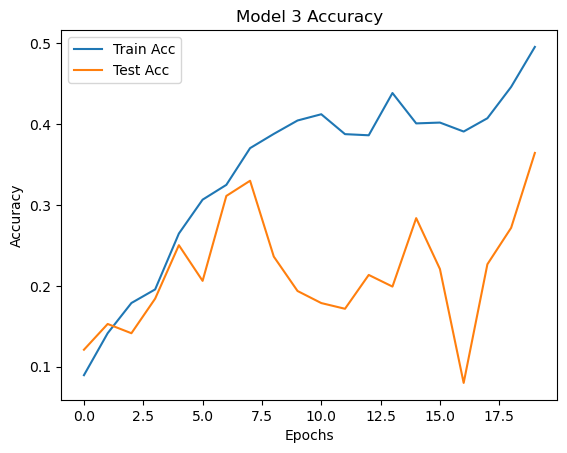

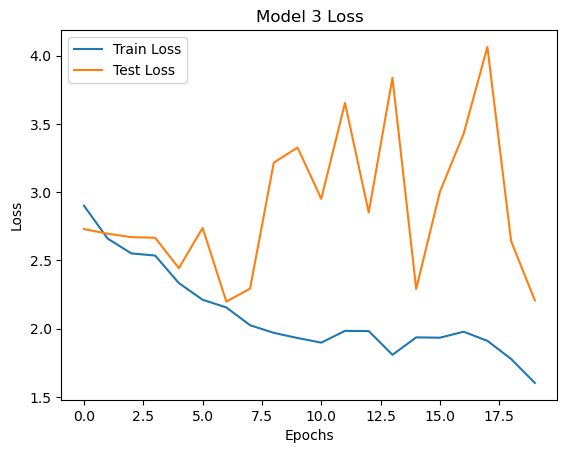

In [25]:
# Accuracy Plot
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Test Acc')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.4 Model 4 (Batch Size = 128, Dropout = 0, Optimizer = SGD)

In [26]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'SGD'

model_4 = create_model(dropout)

In [27]:
# compile model
model_4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
# train model
history_4 = model_4.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 99s 159ms/step - loss: 2.8690 - accuracy: 0.1111 - val_loss: 78.0400 - val_accuracy: 0.0556
Epoch 2/20
333/333 [==============================] - 49s 147ms/step - loss: 2.7001 - accuracy: 0.1541 - val_loss: 141896.8438 - val_accuracy: 0.0483
Epoch 3/20
333/333 [==============================] - 50s 152ms/step - loss: 2.6982 - accuracy: 0.1604 - val_loss: 301181.6250 - val_accuracy: 0.0516
Epoch 4/20
333/333 [==============================] - 50s 151ms/step - loss: 2.6919 - accuracy: 0.1618 - val_loss: 6.2931 - val_accuracy: 0.0557
Epoch 5/20
333/333 [==============================] - 51s 153ms/step - loss: 2.6402 - accuracy: 0.1745 - val_loss: 9.3918 - val_accuracy: 0.0488
Epoch 6/20
333/333 [==============================] - 50s 151ms/step - loss: 2.6156 - accuracy: 0.1837 - val_loss: 3.9854 - val_accuracy: 0.0568
Epoch 7/20
333/333 [==============================] - 51s 152ms/step - loss: 2.5302 - accuracy: 0.2072 - val_loss: 4.45

In [29]:
# train model results
print('Train Loss:', history_4.history['loss'][-1])
print('Train Acc:', history_4.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_4.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.8960342407226562
Train Acc: 0.4038352966308594

Test Loss: 4.361588478088379
Test Acc: 0.09880000352859497


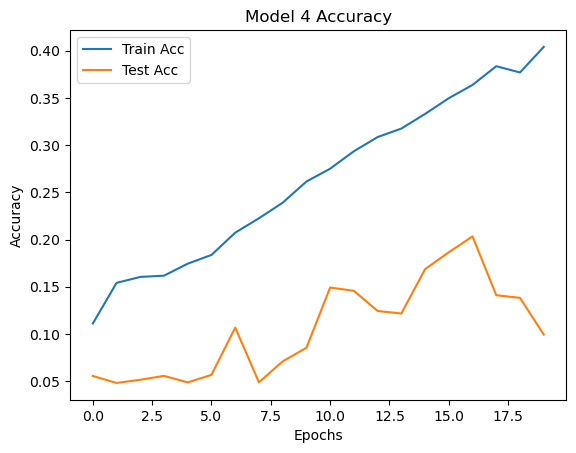

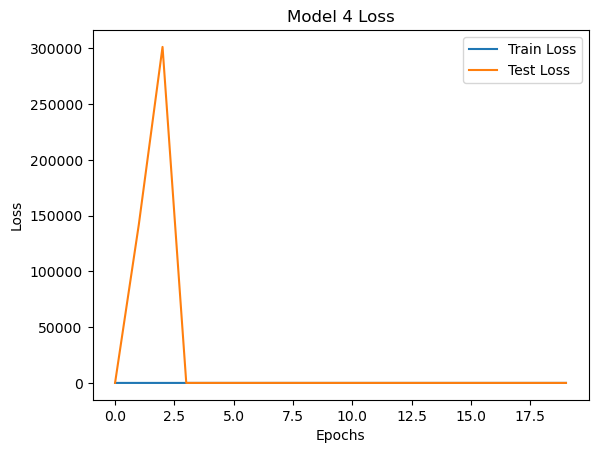

In [30]:
# Accuracy Plot
plt.plot(history_4.history['accuracy'], label='Train Acc')
plt.plot(history_4.history['val_accuracy'], label='Test Acc')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.5 Model 5 (Batch Size = 64, Dropout = 0, Optimizer = SGD)

In [31]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'SGD'

model_5 = create_model(dropout)

In [32]:
# compile model
model_5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
# train model
history_5 = model_5.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 132s 132ms/step - loss: 2.8096 - accuracy: 0.1259 - val_loss: 3.4352 - val_accuracy: 0.0855
Epoch 2/20
665/665 [==============================] - 83s 125ms/step - loss: 2.5928 - accuracy: 0.1916 - val_loss: 3.6940 - val_accuracy: 0.0669
Epoch 3/20
665/665 [==============================] - 83s 124ms/step - loss: 2.4888 - accuracy: 0.2259 - val_loss: 153322396844032.0000 - val_accuracy: 0.0507
Epoch 4/20
665/665 [==============================] - 82s 124ms/step - loss: 2.6976 - accuracy: 0.1592 - val_loss: 5.3104 - val_accuracy: 0.0603
Epoch 5/20
665/665 [==============================] - 85s 128ms/step - loss: 2.5863 - accuracy: 0.1911 - val_loss: 3.0692 - val_accuracy: 0.0647
Epoch 6/20
665/665 [==============================] - 82s 123ms/step - loss: 2.4807 - accuracy: 0.2247 - val_loss: 3.6877 - val_accuracy: 0.0721
Epoch 7/20
665/665 [==============================] - 84s 127ms/step - loss: 2.4286 - accuracy: 0.2408 - val_loss: 

In [34]:
# train model results
print('Train Loss:', history_5.history['loss'][-1])
print('Train Acc:', history_5.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_5.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.9011991024017334
Train Acc: 0.4022352993488312

Test Loss: 2.533517599105835
Test Acc: 0.2635999917984009


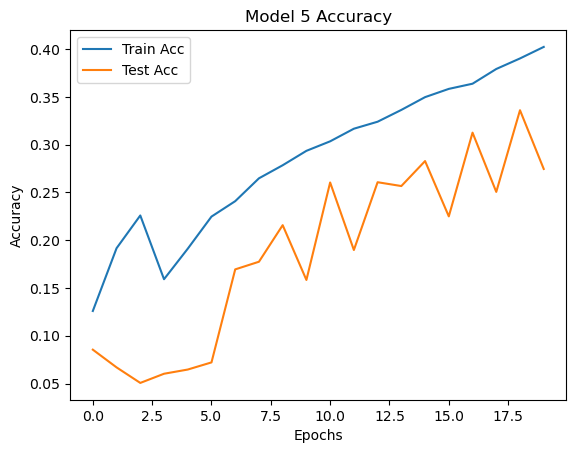

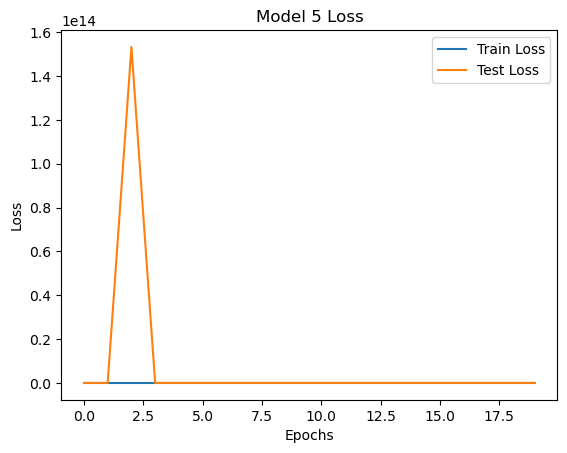

In [35]:
# Accuracy Plot
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Test Acc')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Test Loss')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.6 Model 6 (Batch Size = 64, Dropout = 0.4, Optimizer = SGD)

In [36]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'SGD'

model_6 = create_model(dropout)

In [37]:
# compile model
model_6.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
# train model
history_6 = model_6.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 133s 133ms/step - loss: 2.8929 - accuracy: 0.1009 - val_loss: 4.1671 - val_accuracy: 0.0556
Epoch 2/20
665/665 [==============================] - 84s 126ms/step - loss: 2.6899 - accuracy: 0.1576 - val_loss: 2.8304 - val_accuracy: 0.1132
Epoch 3/20
665/665 [==============================] - 86s 129ms/step - loss: 2.5768 - accuracy: 0.1941 - val_loss: 2.5963 - val_accuracy: 0.1847
Epoch 4/20
665/665 [==============================] - 82s 123ms/step - loss: 2.4763 - accuracy: 0.2276 - val_loss: 2.8763 - val_accuracy: 0.1572
Epoch 5/20
665/665 [==============================] - 84s 127ms/step - loss: 2.4098 - accuracy: 0.2503 - val_loss: 2.4505 - val_accuracy: 0.2312
Epoch 6/20
665/665 [==============================] - 86s 129ms/step - loss: 2.3059 - accuracy: 0.2848 - val_loss: 2.4723 - val_accuracy: 0.2381
Epoch 7/20
665/665 [==============================] - 83s 124ms/step - loss: 2.2504 - accuracy: 0.3001 - val_loss: 2.7227 - val_a

In [39]:
# train model results
print('Train Loss:', history_6.history['loss'][-1])
print('Train Acc:', history_6.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_6.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.4679863452911377
Train Acc: 0.5378117561340332

Test Loss: 3.280867099761963
Test Acc: 0.20659999549388885


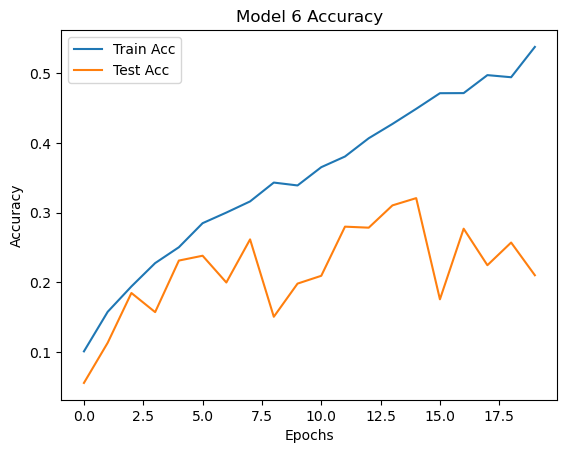

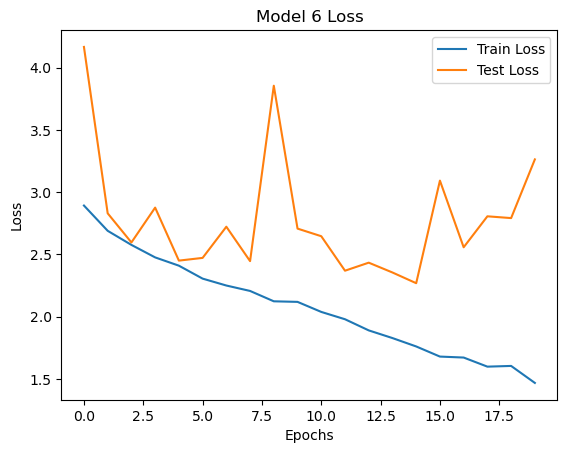

In [40]:
# Accuracy Plot
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Test Acc')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test Loss')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()